<a href="https://colab.research.google.com/github/ViejoLoco27/Renta-de-inmuebles-en-CDMex/blob/main/Pandas_Inmuebles_en_la_Ciudad_de_M%C3%A9xico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas | Rentas de inmuebles en la ciudad de México**

# Demandas del equipo de ML

## **Importando los datos**

In [60]:
import pandas as pd

In [61]:
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
datos_origen = pd.read_csv(url, sep=';')
datos_origen

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN


## **Exploración inicial de los datos**


In [62]:
# Filas = 25,121 - 1
# Se resta una fila por el encabezado
# Columnas = 9
datos_origen.shape

(25121, 9)

In [63]:
# Descripción estadística de las variables
datos_origen.describe()

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
count,25121.000000,25121.000000,25121.000000,25121.000000,2.510700e+04,2.249500e+04,1.803700e+04
mean,1.748856,1.798655,0.656781,220.885076,3.688505e+04,9.528676e+03,4.436513e+03
std,1.811131,22.906129,1.083180,817.465428,3.669381e+05,1.547102e+05,2.283381e+04
min,0.000000,0.000000,0.000000,0.000000,3.150000e+02,3.500000e+00,3.500000e+00
25%,0.000000,0.000000,0.000000,55.000000,5.600000e+03,2.275000e+03,4.270000e+02
50%,2.000000,1.000000,0.000000,90.000000,1.137500e+04,4.056500e+03,1.008000e+03
75%,3.000000,2.000000,1.000000,180.000000,2.695000e+04,7.350000e+03,2.625000e+03
max,100.000000,1966.000000,24.000000,42000.000000,5.250000e+07,2.293400e+07,1.577188e+06


In [64]:
datos_origen.tail(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN
25120,Conjunto Comercial/Sala,Centro Histórico,0,0,0,250,22750.0,14721.0,3881.5


In [65]:
datos_origen.head(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
9,Cocineta,Condesa,1,0,0,27,6300.0,1753.5,NaN


In [66]:
# Selección aleatoria de información del data frame
datos_origen.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
6107,Departamento,Bosques de las Lomas,3,2,1,247,24500.0,5250.0,22533.0
22101,Tienda/Salón,Santa Fe,0,2,0,360,175000.0,12614.0,NaN
2913,Departamento,Santa Fe,3,3,3,150,17500.0,10150.0,1575.0
12368,Departamento,Iztacalco,3,1,1,90,4200.0,1750.0,210.0
16944,Departamento,Lomas de Chapultepec,2,2,1,140,35000.0,10150.0,3150.0
21243,Departamento,Lomas de Chapultepec,3,2,1,70,17500.0,13965.0,NaN
24540,Casa,El Rosedal,1,1,0,36,1750.0,NaN,NaN
17558,Departamento,Bosques de las Lomas,2,1,1,85,11025.0,3045.0,1179.5
3422,Conjunto Comercial/Sala,Santa Fe,0,1,0,30,2450.0,2555.0,NaN
10809,Conjunto Comercial/Sala,Santa Fe,0,1,0,50,3500.0,2100.0,NaN


In [67]:
# Encabezados de las columnas
datos_origen.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [68]:
# Información del tipo de datos de cada columna
datos_origen.dtypes

,0
Tipo,object
Colonia,object
Habitaciones,int64
Garages,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
Impuesto,float64


In [69]:
# Muestra información sobre el tipo de datos y los Non-Null
# Muestra información sobre el número de filas y el número de columnas
# Los valores Non-null son todos aquellos que contienen información válida
#Los valores NaN son un tipo de valor nulo ya que NaN señala la ausencia de valores
datos_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [70]:
# Para conocer infromación específica de los datos contenidos en una columna []
datos_origen['Colonia']

,Colonia
0,Condesa
1,Polanco
2,Santa Fe
3,Centro Histórico
4,Del Valle
...,...
25116,Centro Histórico
25117,Centro Histórico
25118,Mixcoac
25119,Lomas de Chapultepec


In [71]:
# Para concer los datos contenidos de varias columnas [[]]
datos_origen[['Colonia','Valor']]

,Colonia,Valor
0,Condesa,5950.0
1,Polanco,24500.0
2,Santa Fe,18200.0
3,Centro Histórico,2800.0
4,Del Valle,2800.0
...,...,...
25116,Centro Histórico,49000.0
25117,Centro Histórico,2800.0
25118,Mixcoac,4900.0
25119,Lomas de Chapultepec,10500.0


## **Análisis exploratorio de los datos**

### Valores promedio de alquiler por tipo de inmueble

#### ¿Cuáles son los valores promedio de alquiler por tipo de propiedad?

In [72]:
# Se obtienen los valores de la columna "Valor", no obstante el ejercicio requiere que el promedio se obtenga por "Tipo"
round(datos_origen['Valor'].mean(), 2)

np.float64(36885.05)

In [73]:
# La función numeric_only = Tue ignora las columnas que no continen datos numéricos
round(datos_origen.groupby('Tipo').mean(numeric_only = True),2)

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.36,1.90,1.44,289.94,31453.18,3699.42,6629.40
Casa Comercial,1.80,2.12,0.26,370.28,54735.84,7622.19,6166.06
Casa de Condominio,4.32,3.56,3.25,566.30,51428.61,5286.58,15046.94
Casa de Vecindad,1.97,0.38,0.22,79.98,5961.74,413.44,706.85
Cochera/Estacionamiento,0.06,1.38,0.00,18.66,6995.45,1069.08,449.46
Cocineta,0.84,0.02,0.04,29.09,4425.86,1521.73,280.70
Conjunto Comercial/Sala,0.05,2.69,0.00,236.32,57675.21,17489.36,5425.98
Departamento,2.50,1.26,0.89,124.01,18683.27,6797.09,2634.92
Departamento en Hotel,1.42,0.97,0.76,65.85,16285.43,7250.65,1768.92


In [74]:
# Con el siguiente comando se obtinen los valores proedios por tipo de vivienda
# Al encerrar en doble corchete "Valor" se obtiene un tipo data frame
# Con sort_values se organizan los valores de menor a mayor
round(datos_origen.groupby('Tipo')[['Valor']].mean().sort_values('Valor'), 2)


,Valor
Tipo,
Cocineta,4425.86
Posada/Chalé,5180.00
Casa de Vecindad,5961.74
Cochera/Estacionamiento,6995.45
Estudio,8400.00
Loft,9924.53
Departamento en Hotel,16285.43
Departamento,18683.27
Casa,31453.18


<Axes: ylabel='Tipo'>

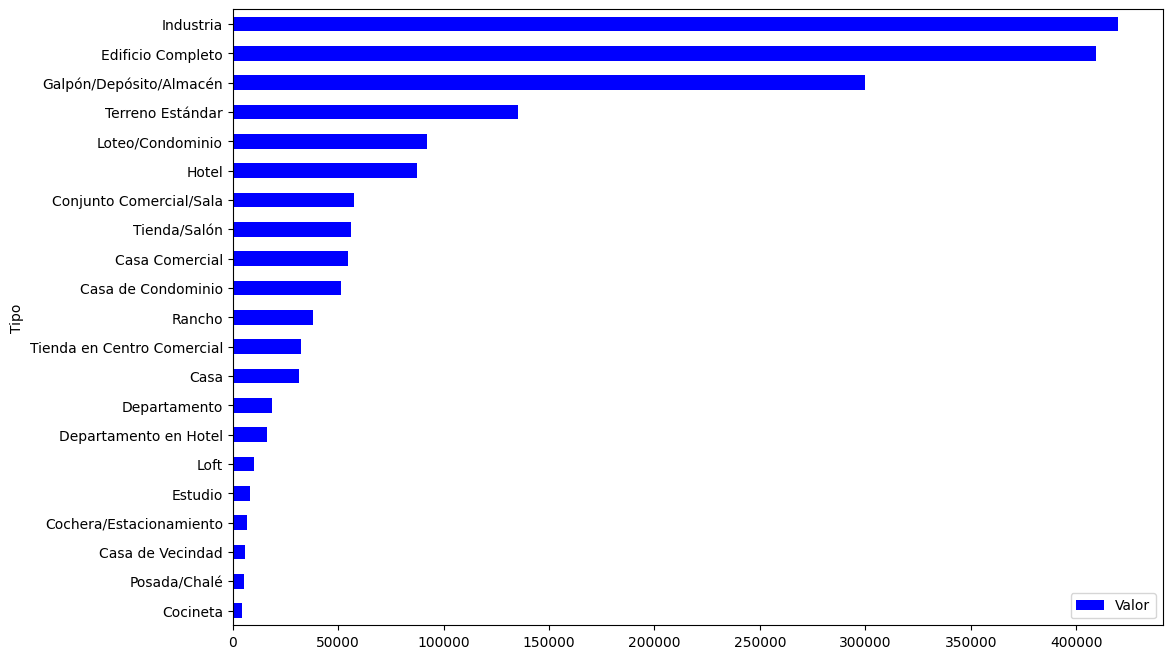

In [75]:
#df_tipo_precio = datos.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
#df_tipo_precio.plot(kind='barh',figsize=(12,8),color='purple')
# kind -> line, bar, barh, hist, box, kde, area entre otras opciones
# color -> código de color headecimal
# title -> titulo del gráfico
# xlabel, ylabel -> títulos de los ejes
# grid -> cuadrícula
# legend -> mostrar / ocultar leyenda
# alpha -> Controla la transparencia de los elementos del gráfico "0 = transparencia total" "1 = opacidad total"
# xlimm, ylim -> límite de los ejes
# style -> Estilo de la línea '-'línea solida '--'línea discontinua
df_tipo_valores = round(datos_origen.groupby('Tipo')[['Valor']].mean().sort_values('Valor'), 2)
df_tipo_valores.plot(kind='barh',figsize=(12,8),color='blue')

In [76]:
# El método .unique muestra un array con los elementos unicos de la columna requerida
datos_origen.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [77]:
# Se crea un array con la variable inmuebles_comerciales para excluir a los inmuebles tipo vivienda
inmuebles_comerciales = ['Conjunto Comercial/Sala', 'Edificio Completo', 'Tienda/Salón', 'Casa Comercial',
                         'Terreno Estándar', 'Cochera/Estacionamiento', 'Galpón/Depósito/Almacén',
                         'Tienda en Centro Comercial','Hotel', 'Loteo/Condominio','Industria']


In [78]:
# Realizamos una consulta mediante el método .query para obtener el data frame que excluye viviendas
datos_origen.query('Tipo in @inmuebles_comerciales')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
11,Edificio Completo,Roma,0,0,0,536,98000.0,NaN,12470.5
24,Conjunto Comercial/Sala,Santa Fe,0,1,0,22,2450.0,NaN,NaN
26,Conjunto Comercial/Sala,Centro Histórico,0,5,0,1306,411390.0,68201.0,NaN
...,...,...,...,...,...,...,...,...,...
25107,Conjunto Comercial/Sala,Santa Fe,0,1,0,55,7000.0,3836.0,NaN
25110,Conjunto Comercial/Sala,Centro Histórico,0,0,0,140,14000.0,4942.0,1736.0
25112,Conjunto Comercial/Sala,Centro Histórico,0,0,0,32,2100.0,3622.5,290.5
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN


In [79]:
# Se declara una variable nueva con la negación de la consulta .query anterior mediante la clausula not in
df_tipo_viviendas = datos_origen.query('Tipo not in @inmuebles_comerciales')
df_tipo_viviendas

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


<Axes: title={'center': 'Valor promedio de las viviendas en Ciudad de México'}, xlabel='Precio', ylabel='Tipo'>

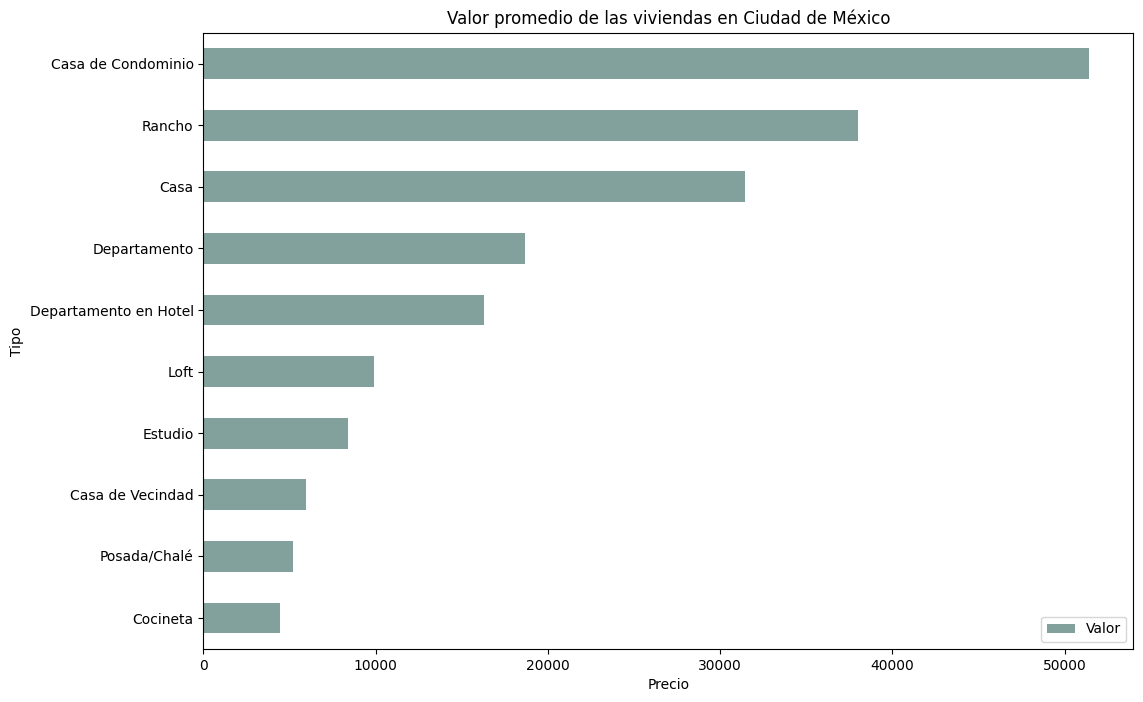

In [80]:
df_tipo_valores = round(df_tipo_viviendas.groupby('Tipo')[['Valor']].mean().sort_values('Valor'), 2)
df_tipo_valores.plot(kind='barh', xlabel= 'Precio', figsize=(12,8), title='Valor promedio de las viviendas en Ciudad de México',color='#82a09c')

### Porcentaje de cada tipo de inmueble presente en la base de datos

#### ¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?

In [81]:
df_tipo_viviendas.Tipo.unique()

array(['Cocineta', 'Casa', 'Departamento', 'Casa de Condominio',
       'Departamento en Hotel', 'Casa de Vecindad', 'Loft', 'Rancho',
       'Posada/Chalé', 'Estudio'], dtype=object)

In [82]:
# Mediante el método value_counts se obtiene el conteo total de los campos
df_tipo_viviendas.Tipo.value_counts()

,count
Tipo,
Departamento,14764
Cocineta,726
Casa de Condominio,610
Casa,545
Departamento en Hotel,455
Casa de Vecindad,158
Loft,38
Rancho,8
Estudio,4


In [83]:
# Complementando el método value_counts mediante la función normalize = True obtenemos la ponderación de los campos
round(df_tipo_viviendas.Tipo.value_counts(normalize=True),2)

,proportion
Tipo,
Departamento,0.85
Cocineta,0.04
Casa de Condominio,0.04
Casa,0.03
Departamento en Hotel,0.03
Casa de Vecindad,0.01
Loft,0.00
Rancho,0.00
Estudio,0.00


In [84]:
# Medainte el método .to_frame se puede convertir una serie en un data frame
ponderacion_viviendas = round(df_tipo_viviendas.Tipo.value_counts(normalize=True),2).to_frame()
ponderacion_viviendas

,proportion
Tipo,
Departamento,0.85
Cocineta,0.04
Casa de Condominio,0.04
Casa,0.03
Departamento en Hotel,0.03
Casa de Vecindad,0.01
Loft,0.00
Rancho,0.00
Estudio,0.00


<Axes: title={'center': 'Ponderación por tipo de viviendas'}, xlabel='Vivienda', ylabel='Ponderación %'>

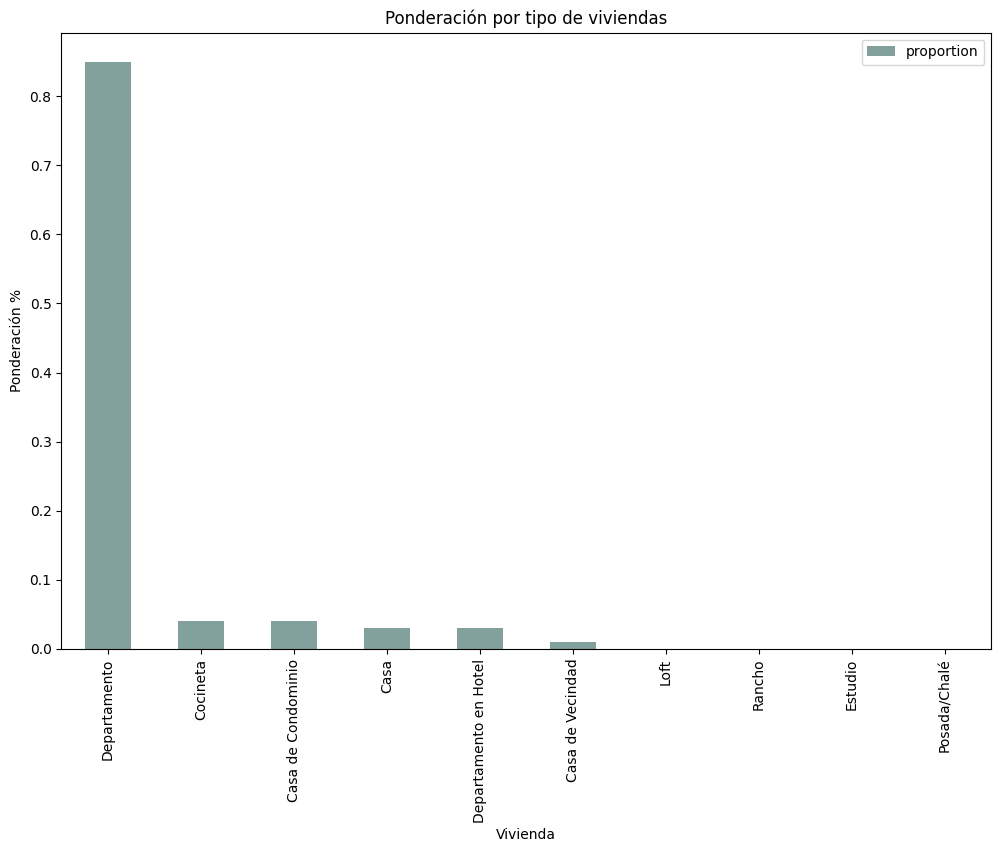

In [85]:
ponderacion_viviendas.plot(kind='bar', figsize=(12,8), title='Ponderación por tipo de viviendas',color='#82a09c',xlabel= 'Vivienda', ylabel='Ponderación %')

In [86]:
df_tipo_viviendas.query('Tipo == "Departamento"')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [87]:
df_deptos = df_tipo_viviendas.query('Tipo == "Departamento"')
df_deptos.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN


## **Tratamiento de valores nulos**

In [88]:
# Para comenzar con el tratamiento de los datos nulos, debemos verificar la existencia de dichos datos y comprobar cuuántos son los campos que contienen este tipo de datos
df_deptos.isnull().sum()

,0
Tipo,0
Colonia,0
Habitaciones,0
Garages,0
Suites,0
Area,0
Valor,7
Condominio,493
Impuesto,3797


In [89]:
df_deptos_snull = df_deptos.isnull()
df_deptos_snull = df_deptos.fillna(0)
df_deptos_snull.isnull().sum()

,0
Tipo,0
Colonia,0
Habitaciones,0
Garages,0
Suites,0
Area,0
Valor,0
Condominio,0
Impuesto,0


In [90]:
df_deptos_snull.shape
df_deptos_snull.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0


## **Remover registros inconsistentes**

In [91]:
# Consulta para obtener valores iguales a 0
df_deptos_snull.query('Valor == 0 | Condominio == 0')


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
116,Departamento,El Rosedal,2,1,0,50,3850.0,0.0,0.0
136,Departamento,Santa Fe,1,1,1,65,8225.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24721,Departamento,Doctores,2,0,0,43,3150.0,0.0,56.0
24736,Departamento,Condesa,1,0,0,30,9100.0,0.0,0.0
24866,Departamento,Condesa,3,0,0,130,16100.0,0.0,0.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,0.0,0.0


In [92]:
# COnsulta para obtener los índices de las filas cuyos valores sean iguales a cero en las columnas "Valores" o "Condominio"
df_deptos_snull.query('Valor == 0 | Condominio == 0').index

Index([    7,    49,    74,   116,   136,   185,   199,   432,   504,   527,
       ...
       24426, 24555, 24563, 24597, 24671, 24721, 24736, 24866, 24892, 25014],
      dtype='int64', length=500)

In [93]:
# df_remover es una función declarada para que sirva como filtro que retira los valores ceros
df_remover = df_deptos_snull.query('Valor == 0 | Condominio == 0').index

In [94]:
print("Índices en df_deptos_snull:", df_deptos_snull.index)
print("Índices en df_remover:", df_remover)

Índices en df_deptos_snull: Index([    3,     4,     7,     8,    10,    13,    14,    16,    18,    19,
       ...
       25101, 25103, 25105, 25106, 25108, 25111, 25113, 25114, 25118, 25119],
      dtype='int64', length=14764)
Índices en df_remover: Index([    7,    49,    74,   116,   136,   185,   199,   432,   504,   527,
       ...
       24426, 24555, 24563, 24597, 24671, 24721, 24736, 24866, 24892, 25014],
      dtype='int64', length=500)


In [95]:
# aplicamos. drop para retirar los valores filtrados de df_remover
# axis=0 indica que la operación se lleva a cabo en las filas
# axis=1 indica que la operación se lleva a cabo en las columnas
# se adicionó errors='ignore' porque sin esta función no corría el código
# El error KeyError que estás recibiendo indica que algunos de los índices que estás intentando eliminar con df_remover no se encuentran en el DataFrame df_deptos_snull.
df_deptos_snull.drop(df_remover,axis=0,inplace=True, errors='ignore')
df_deptos_snull.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0


In [96]:
df_deptos_snull.Tipo.unique()

array(['Departamento'], dtype=object)

In [97]:
df_deptos_snull.drop('Tipo', axis=1, inplace=True, errors='ignore')
df_deptos_snull

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
...,...,...,...,...,...,...,...,...
25111,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


## **Creando filtros**

### 1.Apartamentos que tienen 1 dormitorio y un alquiler menor a MXN 4200.



In [100]:
seleccion1 = df_deptos_snull['Habitaciones']==1
df_deptos_snull[seleccion1]


,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Condesa,1,0,1,40,7000.0,1963.5,175.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
...,...,...,...,...,...,...,...,...
25090,Coyoacán,1,0,0,55,7000.0,2205.0,66.5
25092,Santa Fe,1,1,0,62,5950.0,3307.5,630.0
25100,Lomas de Chapultepec,1,1,1,50,15050.0,6055.0,906.5
25103,Condesa,1,0,0,50,6825.0,1575.0,245.0


In [101]:
seleccion2= df_deptos_snull['Valor']<4200
df_deptos_snull[seleccion2]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
25038,Villa de Guadalupe,2,1,0,50,2800.0,1435.0,0.0
25051,Nativitas,2,1,0,62,3500.0,1050.0,0.0
25065,Nativitas,2,1,0,50,3150.0,1050.0,0.0
25095,Lindavista Sur,2,0,0,63,2800.0,1372.0,0.0


In [102]:
df1 = df_deptos_snull[seleccion1 & seleccion2]
df1

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
24710,Nativitas,1,0,0,40,3150.0,1522.5,0.0
24872,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24943,Roma,1,0,0,21,3500.0,987.0,87.5


In [103]:
filtro1 = df1
filtro1

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
24710,Nativitas,1,0,0,40,3150.0,1522.5,0.0
24872,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24943,Roma,1,0,0,21,3500.0,987.0,87.5


### 2.Apartamentos que tienen al menos 2 dormitorios, un alquiler menor a MXN 10500 y una superficie mayor a 70 m².

In [112]:
filtro2 = (df_deptos_snull['Habitaciones'] >= 2) & (df_deptos_snull['Valor'] < 10500) & (df_deptos_snull['Area'] > 70)
df_deptos_snull[filtro2]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Narvarte,2,1,0,78,7000.0,2450.0,0.0
21,Roma,2,1,0,76,8750.0,2590.0,0.0
33,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
58,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
...,...,...,...,...,...,...,...,...
25028,Del Valle,2,0,1,90,7700.0,1890.0,483.0
25062,Santa Fe,2,1,1,72,5950.0,3045.0,560.0
25063,Narvarte,3,1,0,75,6650.0,3010.0,493.5
25105,Santa Fe,2,1,1,85,7875.0,5463.5,689.5


## **Guardando los archivos**


In [119]:
# El archivo guardado conserva el índice del cual fueron retirados valores mediante los filtros.
df_deptos_snull.to_csv('inmuebles_df_valido_deptos.csv')


In [124]:
# Para subir los data frames a una carpeta drive
# 1.Vincular Drive
# 2. Localizar carpeta y copiar ruta
# 3. Pegar ruta en el nombre del documento y agregar / para continuar con el nombre del documento
df_deptos_snull.to_csv('/content/drive/MyDrive/Alura_Notebook/Ejercicios_Completos/inmuebles_df_valido_deptos.csv', index=False, sep=';')

In [125]:
filtro1.to_csv('/content/drive/MyDrive/Alura_Notebook/Ejercicios_Completos/inmuebles_filtro1.csv', index=False, sep=';')

In [126]:
filtro1.to_csv('/content/drive/MyDrive/Alura_Notebook/Ejercicios_Completos/inmuebles_filtro2.csv', index=False, sep=';')

# Demandas del equipo Desarrollo

### 1. Crear nueva columna Valor_mensual: Esta columna debe contener los gastos mensuales de cada propiedad, incluyendo el alquiler y el condominio.



In [129]:
datos_origen.shape
datos_origen['Valor_mensual'] = datos_origen['Valor'] + datos_origen['Condominio']
datos_origen.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0


### 2. Crear nueva columna Valor_anual: Esta columna debe contener los gastos anuales por propiedad, es decir, el Impuesto más 12 meses de alquiler y condominio.

In [130]:
datos_origen['Valor_anual'] = datos_origen['Valor_mensual'] * 12+datos_origen['Impuesto']
datos_origen.head(3)


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5


### 3. Crear columna categórica | Descripción
Esta columna debe contener un resumen de la información clave de las propiedades que se mostrarán en el sitio web: tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.

In [ ]:
# Esta línea intenta formar la columna "descripción", pero arroja error porque antes hay que convertir los npumeros enteros en strings
#datos['Descripcion'] = datos['Tipo'] + ' en la colonia ' +datos['Colonia'] + \
#                        ' con '+ datos['Habitaciones'] + ' cuarto(s) y '  + \
#                        datos['Garages'] + ' plazas de estacionamiento.'

In [136]:
# Para realizar la conversión del tipo de los datos se emplea el método astype(str)
datos_origen['Descripcion'] = datos_origen['Tipo'] + ' en la colonia ' +datos_origen['Colonia'] + \
                        ' con '+ datos_origen['Habitaciones'].astype(str) + ' cuarto(s) y '  + \
                        datos_origen['Garages'].astype(str) + ' plazas de estacionamiento.'

In [132]:
datos_origen.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuarto(s)...
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuarto(s) y 0...
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...


In [135]:
# El comando .iloc, permite observar el contenido de la fila según su indice
datos_origen.iloc[0]

,0
Tipo,Cocineta
Colonia,Condesa
Habitaciones,1
Garages,0
Suites,0
Area,40
Valor,5950.0
Condominio,1750.0
Impuesto,210.0
Valor_mensual,7700.0


### 4. Crear columna categórica | Tiene_suite
Descripción:Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad.

In [144]:
datos_origen['Tiene_suite'] = datos_origen['Suites'].apply(lambda x: 'Sí' if x > 0 else 'No')
datos_origen.head(3)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuarto(s)...,No
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuarto(s) y 0...,Sí
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...,No


In [145]:
datos_origen.to_csv('/content/drive/MyDrive/Alura_Notebook/Ejercicios_Completos/inmuebles_dev.csv', index=False, sep=';')